# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Используем данные из соревнования Top 100 popular movies from 2003 to 2022 (iMDB)
https://www.kaggle.com/datasets/georgescutelnicu/top-100-popular-movies-from-2003-to-2022-imdb

In [2]:
data = pd.read_csv('data/movies.csv', sep=";")

In [3]:
# размер набора данных
data.shape

(2000, 11)

In [4]:
# типы колонок
data.dtypes

Title                 object
Rating               float64
Year                   int64
Month                 object
Certificate           object
Runtime              float64
Directors             object
Stars                 object
Genre                 object
Filming_location      object
Country_of_origin     object
dtype: object

In [5]:
# проверка на пропущенные значения
data.isnull().sum()

Title                 0
Rating                1
Year                  0
Month                 0
Certificate          34
Runtime               2
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Country_of_origin     0
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114.0,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,"Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,United States


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2000


## Обработка пропусков в данных

### Обработка пропусков в числовых данных

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((2000, 11), (2000, 8))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((2000, 11), (1965, 11))

In [10]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114.0,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,"Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,United States


In [11]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Rating. Тип данных float64. Количество пустых значений 1, 0.05%.
Колонка Runtime. Тип данных float64. Количество пустых значений 2, 0.1%.


In [12]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Rating,Runtime
0,7.8,192.0
1,7.6,117.0
2,7.3,127.0
3,7.8,114.0
4,6.4,102.0
...,...,...
1995,7.1,114.0
1996,5.5,117.0
1997,5.8,98.0
1998,7.1,105.0


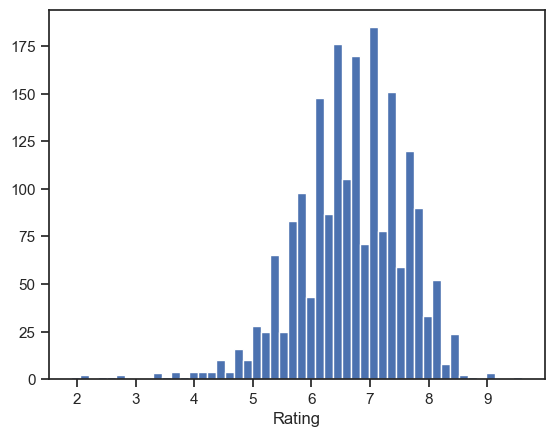

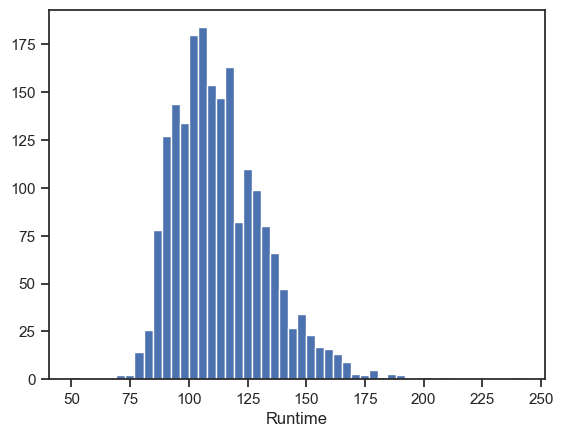

In [13]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

Пропуски данных в колонке Rating заполним на медианное значение, в колонке Runtime - на наиболее повторяющееся

In [14]:
data_num_Rating = data_num[['Rating']]
data_num_Rating.head()

,Rating
0,7.8
1,7.6
2,7.3
3,7.8
4,6.4


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [16]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_Rating_only = indicator.fit_transform(data_num_Rating)
mask_missing_Rating_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [17]:
imp_num = SimpleImputer(strategy='median')
data_num_imp_Rating = imp_num.fit_transform(data_num_Rating)
data_num_imp_Rating[mask_missing_Rating_only]

array([6.7])

In [18]:
np.unique(data_num_imp_Rating)

array([1.9, 2.1, 2.2, 2.4, 2.6, 2.8, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3,
       5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6,
       6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9,
       8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.8, 9. , 9.6])

In [19]:
data_num_Runtime = data_num[['Runtime']]
data_num_Runtime.head()

,Runtime
0,192.0
1,117.0
2,127.0
3,114.0
4,102.0


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [21]:
indicator = MissingIndicator()
mask_missing_Runtime_only = indicator.fit_transform(data_num_Runtime)
mask_missing_Runtime_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [22]:
imp_num = SimpleImputer(strategy='most_frequent')
data_num_imp_Runtime = imp_num.fit_transform(data_num_Runtime)
data_num_imp_Runtime[mask_missing_Runtime_only]

array([104., 104.])

In [23]:
np.unique(data_num_imp_Runtime)

array([ 50.,  70.,  71.,  75.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105.,
       106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116.,
       117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127.,
       128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138.,
       139., 140., 141., 142., 143., 144., 145., 146., 147., 148., 149.,
       150., 151., 152., 153., 154., 155., 156., 157., 158., 159., 160.,
       161., 162., 163., 164., 165., 166., 167., 168., 169., 170., 172.,
       175., 176., 178., 179., 180., 181., 187., 188., 191., 192., 201.,
       209., 242.])

### Обработка пропусков в категориальных данных

In [24]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Certificate. Тип данных object. Количество пустых значений 34, 1.7%.


In [25]:
cat_temp_data = data[['Certificate']]
cat_temp_data.head()

,Certificate
0,PG-13
1,PG
2,R
3,R
4,PG-13


In [26]:
cat_temp_data['Certificate'].unique()

array(['PG-13', 'PG', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'TV-Y7',
       'Not Rated', nan, 'NC-17', 'TV-G', 'Unrated', 'G'], dtype=object)

In [27]:
cat_temp_data[cat_temp_data['Certificate'].isnull()].shape

(34, 1)

In [28]:
# Импьютация константой
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp = imp.fit_transform(cat_temp_data)
data_imp

array([['PG-13'],
       ['PG'],
       ['R'],
       ...,
       ['R'],
       ['R'],
       ['R']], dtype=object)

In [29]:
np.unique(data_imp)

array(['G', 'NA', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-14',
       'TV-G', 'TV-MA', 'TV-PG', 'TV-Y7', 'Unrated'], dtype=object)

In [30]:
data_imp[data_imp=='NA'].size

34

### Преобразование категориальных признаков в числовые

Используем OrdinalEncoder, который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
data_oe = data[['Title', 'Month', 'Certificate', 'Directors', 'Stars', 'Genre', 'Filming_location', 'Country_of_origin']]
data_oe.head()

,Title,Month,Certificate,Directors,Stars,Genre,Filming_location,Country_of_origin
0,Avatar: The Way of Water,December,PG-13,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,United States
1,Guillermo del Toro's Pinocchio,December,PG,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"United States, Mexico, France"
2,Bullet Train,August,R,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"Japan, United States"
3,The Banshees of Inisherin,November,R,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,"Ireland, United Kingdom, United States"
4,M3gan,December,PG-13,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,United States


In [33]:
data_oe['Title'].unique()

array(['Avatar: The Way of Water', "Guillermo del Toro's Pinocchio",
       'Bullet Train', ..., 'Gothika', 'Ong-Bak: The Thai Warrior',
       'Open Water'], dtype=object)

In [34]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp2.fit_transform(data_oe)
data_oe_filled

array([['Avatar: The Way of Water', 'December', 'PG-13', ...,
        'Action, Adventure, Fantasy', 'New Zealand', 'United States'],
       ["Guillermo del Toro's Pinocchio", 'December', 'PG', ...,
        'Animation, Drama, Family', 'USA',
        'United States, Mexico, France'],
       ['Bullet Train', 'August', 'R', ..., 'Action, Comedy, Thriller',
        'Japan', 'Japan, United States'],
       ...,
       ['Gothika', 'November', 'R', ..., 'Horror, Mystery, Thriller',
        'Canada', 'United States, France, Canada, Spain'],
       ['Ong-Bak: The Thai Warrior', 'February', 'R', ...,
        'Action, Crime, Thriller', 'Thailand',
        'Thailand, France, Hong Kong'],
       ['Open Water', 'August', 'R', ..., 'Adventure, Drama, Horror',
        'Bahamas', 'United States']], dtype=object)

In [35]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[ 151.,    4.,    5., ...,    7.,   56.,  245.],
       [ 597.,    4.,    4., ...,   98.,   87.,  355.],
       [ 249.,    3.,    6., ...,   25.,   41.,  121.],
       ...,
       [ 580.,   11.,    6., ...,  233.,   11.,  293.],
       [1034.,    5.,    6., ...,   33.,   83.,  172.],
       [1039.,    3.,    6., ...,   74.,    4.,  245.]])

In [36]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.986e+03, 1.987e+03,
       1.988e+03])

In [37]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13.])

In [38]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [39]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(["'71", '10 Cloverfield Lane', '10,000 BC', ..., 'Zootopia',
        'tick, tick... BOOM!', 'Æon Flux'], dtype=object),
 array(['2008', '2014', 'April', 'August', 'December', 'February',
        'January', 'July', 'June', 'March', 'May', 'November', 'October',
        'September'], dtype=object),
 array(['G', 'NA', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-14',
        'TV-G', 'TV-MA', 'TV-PG', 'TV-Y7', 'Unrated'], dtype=object),
 array(['Aamir Khan, Amole Gupte', 'Aaron Blaise, Robert Walker',
        'Aaron Hann, Mario Miscione', ..., 'Zach Cregger', 'Zack Snyder',
        'Zak Hilditch'], dtype=object),
 array(['A J Cook, Ali Larter, Tony Todd, Michael Landes',
        'Aamir Khan, Madhavan, Mona Singh, Sharman Joshi',
        'Aaron Eckhart, Hilary Swank, Delroy Lindo, Bruce Greenwood', ...,
        'Zoey Deutch, Kendrick Sampson, Ray Nicholson, Shay Mitchell',
        'Zoey Deutch, Lucy Fry, Danila Kozlovskiy, Gabriel Byrne',
        'Zooey Deschanel, Joseph Gordon Levi

In [40]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Avatar: The Way of Water', 'December', 'PG-13', ...,
        'Action, Adventure, Fantasy', 'New Zealand', 'United States'],
       ["Guillermo del Toro's Pinocchio", 'December', 'PG', ...,
        'Animation, Drama, Family', 'USA',
        'United States, Mexico, France'],
       ['Bullet Train', 'August', 'R', ..., 'Action, Comedy, Thriller',
        'Japan', 'Japan, United States'],
       ...,
       ['Gothika', 'November', 'R', ..., 'Horror, Mystery, Thriller',
        'Canada', 'United States, France, Canada, Spain'],
       ['Ong-Bak: The Thai Warrior', 'February', 'R', ...,
        'Action, Crime, Thriller', 'Thailand',
        'Thailand, France, Hong Kong'],
       ['Open Water', 'August', 'R', ..., 'Adventure, Drama, Horror',
        'Bahamas', 'United States']], dtype=object)

## Масштабирование данных

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### MinMax масштабирование

In [42]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Runtime']])

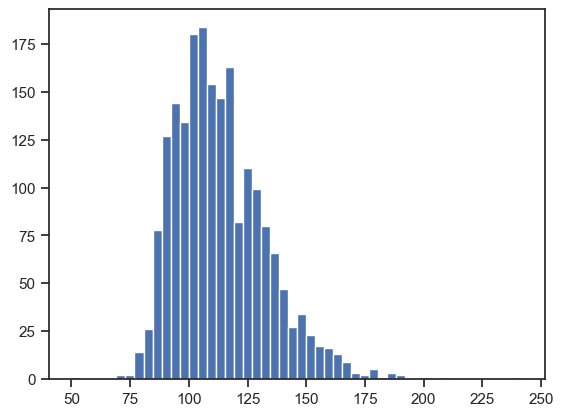

In [43]:
plt.hist(data['Runtime'], 50)
plt.show()

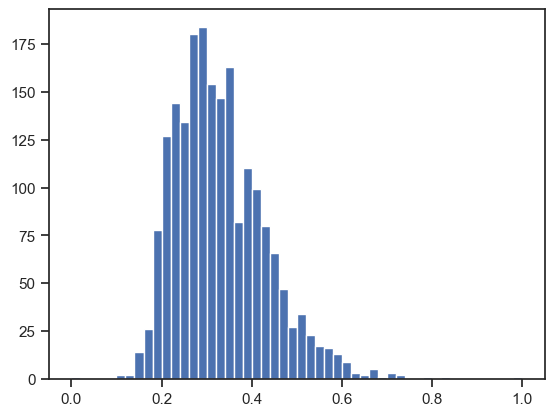

In [44]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [45]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Runtime']])

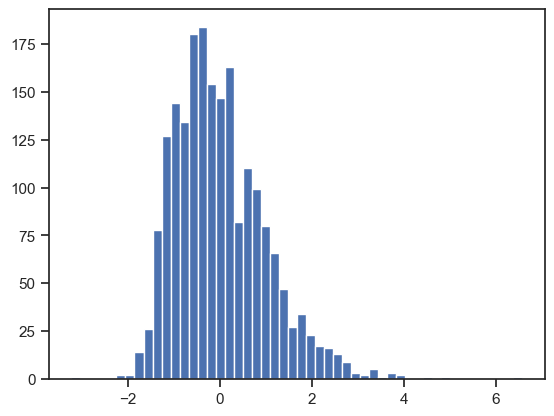

In [46]:
plt.hist(sc2_data, 50)
plt.show()